# Basics of Keras sequential API

(Original Notebook: Rodrigo Agundez)

### Tell Keras to use tensorflow as backend

At the moment is the default option

In [42]:
import os

os.environ['KERAS_BACKEND'] = 'tensorflow'

In [43]:
import inspect

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# from utils import plot_training_summary
# from utils import TimeSummary
# from utils import set_seed

%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 6

### Import `Sequential` model API

In [44]:
from keras.models import Sequential

### Import predefined `layers`

In [45]:
from keras import layers
[layer for layer in dir(layers) if not layer.startswith('_')]

['Activation',
 'ActivityRegularization',
 'Add',
 'AlphaDropout',
 'AtrousConv1D',
 'AtrousConv2D',
 'AtrousConvolution1D',
 'AtrousConvolution2D',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'ConvLSTM2DCell',
 'ConvRNN2D',
 'ConvRecurrent2D',
 'Convolution1D',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'CuDNNGRU',
 'CuDNNLSTM',
 'Deconv2D',
 'Deconv3D',
 'Deconvolution2D',
 'Deconvolution3D',
 'Dense',
 'DepthwiseConv2D',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPoo

### Import `optimizers`

In [46]:
from keras import optimizers
[opt for opt in dir(optimizers) if not opt.startswith('_')]

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'K',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 'TFOptimizer',
 'absolute_import',
 'adadelta',
 'adagrad',
 'adam',
 'adamax',
 'clip_norm',
 'copy',
 'deserialize',
 'deserialize_keras_object',
 'division',
 'get',
 'interfaces',
 'nadam',
 'print_function',
 'rmsprop',
 'serialize',
 'serialize_keras_object',
 'sgd',
 'six',
 'tf',
 'zip']

### Build dummy  model

![simple nn](images/model_diagram.gif)

first initialize the model with the sequential API

In [47]:
model = Sequential(name='DummyModel')

we can immidiatelly add hidden layers using `model.add()`

In [48]:
help(model.add)

Help on method add in module keras.engine.sequential:

add(layer) method of keras.engine.sequential.Sequential instance
    Adds a layer instance on top of the layer stack.
    
    # Arguments
        layer: layer instance.
    
    # Raises
        TypeError: If `layer` is not a layer instance.
        ValueError: In case the `layer` argument does not
            know its input shape.
        ValueError: In case the `layer` argument has
            multiple output tensors, or is already connected
            somewhere else (forbidden in `Sequential` models).



for each layer you can define the metadata parameters of it. For example the `Dense()` layer has name, number of units, its activation function, etc.

In [49]:
help(layers.Dense)

Help on class Dense in module keras.layers.core:

class Dense(keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: if the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  # Example
 |  
 |  ```python
 |      # as first layer in a sequential model:
 |      model = Sequential()
 |      model.add(Dense(32, input_shape=(16,)))
 |      # now the model will take as input arrays of shape (*, 16)
 |      # and output arrays of shape (*, 32)
 |  
 |      # after the first layer, you don't need to specify
 |      # the size of the 

create the firts hidden layer of 3 units

In [50]:
# this should raise a ValueError
# model.add(layers.Dense(name='FullyConnected_1', units=3, activation='relu'))

Keras takes a simple approach and defines the input layer together with the first hidden layer via the parameter `input_dim` or `input_shape`. 

In [51]:
model.add(layers.Dense(name='FullyConnected_1', units=3, activation='relu', input_dim=2))

let's see the structure of the model

In [52]:
# model.summary()

**Question:** why are there 9 parameters?

> #### extra
>
> Which other activations could you use? Check out the [list of activations](https://keras.io/activations/).

now we can add the next hidden layer of 2 units

In [53]:
model.add(layers.Dense(name='FullyConnected_2', units=2, activation='relu'))
# model.summary()

add the output layer of a single unit and use a `sigmoid` activation function

In [54]:
model.add(layers.Dense(name='FullyConnected_OutputLayer', units=1, activation='sigmoid'))
# model.summary()

Models have to be compiled before training, we need to add:

- optimizer
- loss function
- metrics

The loss function defines the goal of our model. In this case binary classification.

The metric(s) set can be used to evaluate over the test dataset, but also, if at trainining time we define `validation_split`, a validation test will be performed over each epoch. This is very helpful to asses the health of our model (overfitting for example).

In [55]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

> #### extra
>
> - Which other optimizers are available? Check the [list of optimizers](https://keras.io/optimizers/)
> - How many losses are there avilable? Check the [list of loss functions](https://keras.io/losses/)
> - What other metrics? [List of metrics](https://keras.io/metrics/)

If you really want the complete picture, check the configuration. Don't worry if you don't understand what all the parameters mean

In [56]:
model.get_config()

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 2),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale': 1.0,
      'seed': None}},
    'kernel_regularizer': None,
    'name': 'FullyConnected_1',
    'trainable': True,
    'units': 3,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      '

### Model is ready be trained but where is the data?

Normally you would look at the data frist of course before creating the model, but this notebook focuses on the Keras API.

In [57]:
moons = pd.read_csv('data/moons.csv')
print('(rows, columns):', moons.shape)
moons.sample(3)

(rows, columns): (1000, 3)


,x1,x2,y
119,2.099899,0.120462,1
562,0.370787,-0.273009,1
438,0.310227,-0.248469,1


non-linearly separable data

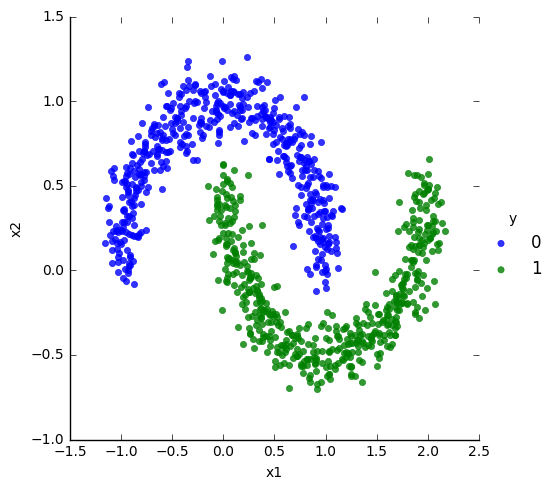

In [58]:
sns.lmplot(data=moons, x='x1', y='x2', hue='y', fit_reg=False);

separate in train and test data

In [59]:
train_index = moons.sample(frac=0.8, random_state=21).index
X_train, y_train = moons.iloc[train_index][['x1', 'x2']], moons.iloc[train_index]['y']
X_test, y_test = moons.drop(index=train_index)[['x1', 'x2']], moons.drop(index=train_index)['y']

In [60]:
summary = model.fit(
    X_train.values, y_train.values,
    batch_size=100,
    epochs=10
)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# plot_training_summary(summary, time_summary)

Epoch 1/10
800/800 [==============================] - 1s 1ms/step - loss: 0.7004 - acc: 0.5100
Epoch 2/10
800/800 [==============================] - 0s 28us/step - loss: 0.6984 - acc: 0.5287
Epoch 3/10
800/800 [==============================] - 0s 33us/step - loss: 0.6964 - acc: 0.5500
Epoch 4/10
800/800 [==============================] - 0s 30us/step - loss: 0.6943 - acc: 0.5825
Epoch 5/10
800/800 [==============================] - 0s 13us/step - loss: 0.6922 - acc: 0.6112
Epoch 6/10
800/800 [==============================] - 0s 21us/step - loss: 0.6903 - acc: 0.6300
Epoch 7/10
800/800 [==============================] - 0s 21us/step - loss: 0.6883 - acc: 0.6413
Epoch 8/10
800/800 [==============================] - 0s 28us/step - loss: 0.6864 - acc: 0.6562
Epoch 9/10
800/800 [==============================] - 0s 25us/step - loss: 0.6846 - acc: 0.6738
Epoch 10/10
800/800 [==============================] - 0s 21us/step - loss: 0.6827 - acc: 0.6800
Test loss: 0.679176204205
Test accuracy:

### Explicit creation of layers

The model we created looks like

In [61]:
model = Sequential()
model.add(layers.Dense(name='FullyConnected_1', units=3, activation='relu', input_dim=2))
model.add(layers.Dense(name='FullyConnected_2', units=2, activation='relu'))
model.add(layers.Dense(name='FullyConnected_OutputLayer', units=1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FullyConnected_1 (Dense)     (None, 3)                 9         
_________________________________________________________________
FullyConnected_2 (Dense)     (None, 2)                 8         
_________________________________________________________________
FullyConnected_OutputLayer ( (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


we could have defined explicitly each of the activation functions components as an extra layer

In [62]:
model = Sequential()

# input layer transformations (none in this case)

# 1st hidden layer
model.add(layers.Dense(name='HiddenLayer_1', units=3, input_dim=2))
model.add(layers.Activation(name='ReLu_1', activation='relu'))

# 2nd hidden layer
model.add(layers.Dense(name='HiddenLayer_2', units=2))
model.add(layers.Activation(name='ReLu_2', activation='relu'))
# output layer
model.add(layers.Dense(name='OutputLayer', units=1))
model.add(layers.Activation(name='Sigmoid_3', activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer_1 (Dense)        (None, 3)                 9         
_________________________________________________________________
ReLu_1 (Activation)          (None, 3)                 0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 2)                 8         
_________________________________________________________________
ReLu_2 (Activation)          (None, 2)                 0         
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 3         
_________________________________________________________________
Sigmoid_3 (Activation)       (None, 1)                 0         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


this is very important to understand as it allows for flexibility on the layer order when customizing a deep neaural network.

NOTE: we use this explicit layer declaration in exercise 2

## Exercise 1

Change the parameters:

- batch_size
- epochs

and observe what happens to the execution time and learning curves

In [63]:
def make_model():
    model = Sequential()
    model.add(layers.Dense(name='FullyConnected_1', units=3, activation='relu', input_dim=2))
    model.add(layers.Dense(name='FullyConnected_2', units=2, activation='relu'))
    model.add(layers.Dense(name='FullyConnected_OutputLayer', units=1, activation='sigmoid'))
    return model

model = make_model()

In [64]:
# set_seed(123) # for reproducibility

model = make_model()

model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
summary = model.fit(
    X_train.values, y_train.values,
    batch_size=100,
    epochs=10,
    validation_split=0.1,
    verbose=0
)
score = model.evaluate(X_test.values, y_test.values, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# plot_training_summary(summary, time_summary)

Test loss: 0.693541109562
Test accuracy: 0.46
